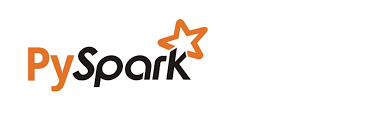

### Why PySpark?
> * Python is one of the most popular languages for data preprocssing, wrangling and data modeling when it comes to Data Science and Machine Learning.
> * Apache Spark is the most powerful big data tool (a parallel distributed processing framework). The core power is to handle huge amounts of data. When you are working on a cluster, it can distribute the tasks/processing across nodes.
> * Spark is written in Scala and runs on the JVM (Java Virtual Machine). With PySpark, we can levearge the power of Apache Spark using Python.
> * PySpark is an interface for Apache Spark in Python. It not only allows you to write Spark applications using Python APIs, but also provides the PySpark shell for interactively analyzing your data in a distributed environment.
> * Spark has built-in components for processing streaming data, machine learning (SparkML), graph processing (GraphX), and even interacting with data via SQL (Spark SQL).
> * PySpark supports most of Spark’s features such as,
> > * Spark SQL and DataFrame (The sql function on a SparkSession enables applications to run SQL queries programmatically and returns the result as a DataFrame.)
> > * Spark Streaming
> > * MLlib (Machine Learning - Building models and creating pipelines) and
> > * Spark Core (underlying general execution engine for the Spark platform that all other functionality is built on top of).!

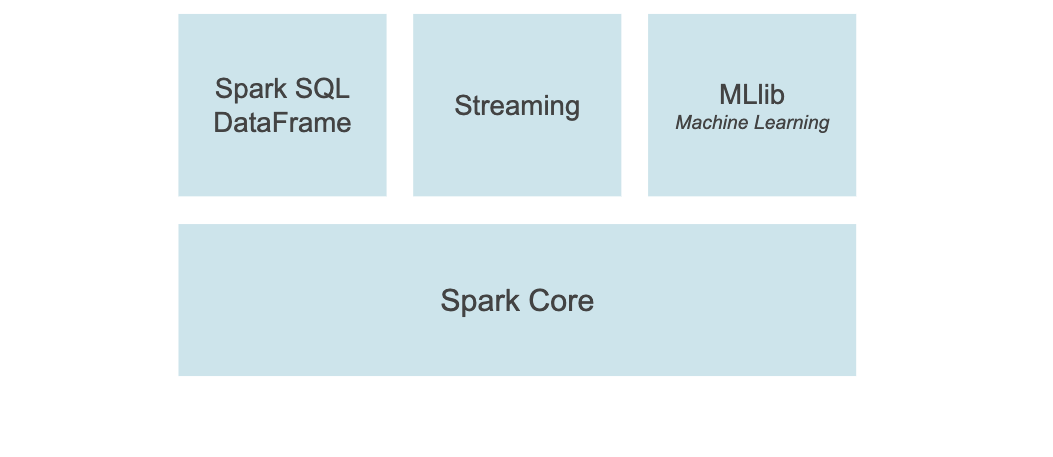

### Steps:
Create Virtual Environment-
> - conda create -n Spark python==3.8
> - wget -q https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
> - tar -xvzf spark-3.1.1-bin-hadoop2.7.tgz
> - pip install -q findspark
> - pip install pyspark, jupyter, pandas

In [16]:
import findspark
#findspark.init(r'C:\Users\rosha\Downloads\Spark\spark-3.1.1-bin-hadoop2.7')

In [1]:
import os
#Assuming JAVA_HOME is set in enviroment variables 
os.environ["SPARK_HOME"] = r"C:\Users\rosha\Downloads\Spark\spark-3.1.1-bin-hadoop2.7"

In [18]:
findspark.init()

<h3>SparkSession - Initialize entry point to Spark.</h3>
<br>
Every Spark application needs an entry point to co-ordinate tasks, do operations, read & write data, access spark features, etc.
<br>
<br>
<b>Spark 1.x</b> provides 3 entry points: <u>SparkContext</u>, <u>SQLContext</u> and <u>HiveContext</u>. We have to initialize these entry points seperately to do operations.
<br>
<br>
<b>Spark 2.x</b> provides a new entry point SparkSession, which is a combination of all the above-mentioned contexts and can be accessed using Spark Session object.

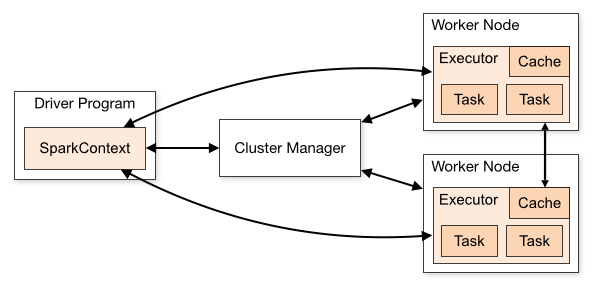

> ### SparkContext
> - The SparkContext is used by the driver process of the Spark Application in order to establish a communication with the cluster and the resource managers in order to coordinate and execute jobs.

> ### SQL Context
> - SQLContext is the entry point to SparkSQL which is a Spark module for structured data processing. Once SQLContext is initialised, the user can then use it in order to perform various "sql-like" operations over Dataframes.

> ### Spark Session
> - Spark Session is a combination of the above contexts which helps users to avoid confusion.

In [30]:

from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .master("local") \
        .appName("Hands-on PySpark") \
        .getOrCreate()

In [31]:
spark

In [66]:
# Load data
filepath = r"C:\Users\rosha\Downloads\Spark\california_housing_train.csv"
spark_data = spark.read.format('csv').load(filepath)

In [67]:

# Print the top 5 rows using .show() function
spark_data.show(5, truncate=False)

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|_c0        |_c1      |_c2               |_c3        |_c4           |_c5        |_c6       |_c7          |_c8               |
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|longitude  |latitude |housing_median_age|total_rooms|total_bedrooms|population |households|median_income|median_house_value|
|-114.310000|34.190000|15.000000         |5612.000000|1283.000000   |1015.000000|472.000000|1.493600     |66900.000000      |
|-114.470000|34.400000|19.000000         |7650.000000|1901.000000   |1129.000000|463.000000|1.820000     |80100.000000      |
|-114.560000|33.690000|17.000000         |720.000000 |174.000000    |333.000000 |117.000000|1.650900     |85700.000000      |
|-114.570000|33.640000|14.000000         |1501.000000|337.000000    |515.000000 |226.000000|3.191700     |73400.000000

In [68]:
# We can set header=true as one of the options. This will read the first row as header
spark_data = spark.read.format('csv').options(header='true').load(r"C:\Users\rosha\Downloads\Spark\california_housing_train.csv")
spark_data.show(5, truncate=False)

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|longitude  |latitude |housing_median_age|total_rooms|total_bedrooms|population |households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|-114.310000|34.190000|15.000000         |5612.000000|1283.000000   |1015.000000|472.000000|1.493600     |66900.000000      |
|-114.470000|34.400000|19.000000         |7650.000000|1901.000000   |1129.000000|463.000000|1.820000     |80100.000000      |
|-114.560000|33.690000|17.000000         |720.000000 |174.000000    |333.000000 |117.000000|1.650900     |85700.000000      |
|-114.570000|33.640000|14.000000         |1501.000000|337.000000    |515.000000 |226.000000|3.191700     |73400.000000      |
|-114.570000|33.570000|20.000000         |1454.000000|326.000000    |624.000000 |262.000000|1.925000     |65500.000000

In [69]:
# print Schema of the loaded dataframe
spark_data.printSchema()

root
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- housing_median_age: string (nullable = true)
 |-- total_rooms: string (nullable = true)
 |-- total_bedrooms: string (nullable = true)
 |-- population: string (nullable = true)
 |-- households: string (nullable = true)
 |-- median_income: string (nullable = true)
 |-- median_house_value: string (nullable = true)



Here you can see even though most of values are of differant data types it identified all as string so we can use inferSchema option.

In [70]:
# We can set inferSchema='true' to infer the data schema while reading the data
spark_data = spark.read.format('csv').options(header='true', inferSchema='true').load(r"C:\Users\rosha\Downloads\Spark\california_housing_train.csv")
spark_data.show(5, truncate=False)
spark_data.printSchema()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|-114.31  |34.19   |15.0              |5612.0     |1283.0        |1015.0    |472.0     |1.4936       |66900.0           |
|-114.47  |34.4    |19.0              |7650.0     |1901.0        |1129.0    |463.0     |1.82         |80100.0           |
|-114.56  |33.69   |17.0              |720.0      |174.0         |333.0     |117.0     |1.6509       |85700.0           |
|-114.57  |33.64   |14.0              |1501.0     |337.0         |515.0     |226.0     |3.1917       |73400.0           |
|-114.57  |33.57   |20.0              |1454.0     |326.0         |624.0     |262.0     |1.925        |65500.0           |
+---------+--------+----

In [71]:
# Get the number of rows in the dataframe
spark_data.count()

17000

### Convert Spark DF to Pandas DF
> * Once you convert into pandas, you can use all the python libraries for modeling, visualization, preprocessing, etc.

In [72]:
pandas_df = spark_data.toPandas()
pandas_df.shape

(17000, 9)

In [73]:
pandas_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [74]:
pandas_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [75]:
pandas_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [76]:
# You can sample to sample the dataset and convert the data into pandas for further analysis if spark_df in huge
sample_pandas_df = spark_data.sample(withReplacement=False, fraction=0.01).toPandas()
sample_pandas_df.shape

(179, 9)

In [77]:
sample_pandas_df["housing_median_age"].value_counts()

52.0    14
37.0     9
24.0     8
26.0     7
16.0     7
36.0     7
35.0     6
34.0     6
19.0     6
33.0     6
32.0     6
22.0     5
17.0     5
31.0     5
15.0     4
39.0     4
29.0     4
28.0     4
10.0     3
27.0     3
23.0     3
13.0     3
30.0     3
5.0      3
45.0     3
9.0      3
21.0     3
38.0     3
44.0     3
2.0      2
48.0     2
6.0      2
25.0     2
50.0     2
43.0     2
40.0     2
18.0     2
42.0     2
20.0     2
46.0     2
51.0     2
11.0     2
4.0      1
41.0     1
12.0     1
3.0      1
14.0     1
7.0      1
47.0     1
Name: housing_median_age, dtype: int64

### Convert Pandas DF to Spark DF

In [78]:
# Select few columns
pandas_df_subset = pandas_df[["longitude", "latitude", "housing_median_age", "total_rooms"]].copy()
pandas_df_subset.head()

,longitude,latitude,housing_median_age,total_rooms
0,-114.31,34.19,15.0,5612.0
1,-114.47,34.40,19.0,7650.0
2,-114.56,33.69,17.0,720.0
3,-114.57,33.64,14.0,1501.0
4,-114.57,33.57,20.0,1454.0


In [79]:
pandas_df_subset.shape

(17000, 4)

In [80]:
spark_df_from_pandas = spark.createDataFrame(pandas_df_subset)
spark_df_from_pandas.show(5)
spark_df_from_pandas.printSchema()

+---------+--------+------------------+-----------+
|longitude|latitude|housing_median_age|total_rooms|
+---------+--------+------------------+-----------+
|  -114.31|   34.19|              15.0|     5612.0|
|  -114.47|    34.4|              19.0|     7650.0|
|  -114.56|   33.69|              17.0|      720.0|
|  -114.57|   33.64|              14.0|     1501.0|
|  -114.57|   33.57|              20.0|     1454.0|
+---------+--------+------------------+-----------+
only showing top 5 rows

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)



In [81]:
type(spark_df_from_pandas)

pyspark.sql.dataframe.DataFrame

In [82]:
spark_df_from_pandas.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)



In [83]:
from pyspark.sql.types import *
schema = StructType([
      StructField("longitude", StringType(), True),
      StructField("latitude", StringType(), True),
      StructField("housing_median_age", StringType(), True),
      StructField("total_rooms", StringType(), True)])

spark_df_from_pandas = spark.createDataFrame(pandas_df_subset, schema=schema)
spark_df_from_pandas.show(2)
spark_df_from_pandas.printSchema()

+---------+--------+------------------+-----------+
|longitude|latitude|housing_median_age|total_rooms|
+---------+--------+------------------+-----------+
|  -114.31|   34.19|              15.0|     5612.0|
|  -114.47|    34.4|              19.0|     7650.0|
+---------+--------+------------------+-----------+
only showing top 2 rows

root
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- housing_median_age: string (nullable = true)
 |-- total_rooms: string (nullable = true)



In [85]:
columns_to_use = ["longitude", "latitude"]
spark_df = spark_df_from_pandas.select(*columns_to_use)
spark_df.show(5, truncate=False)

+---------+--------+
|longitude|latitude|
+---------+--------+
|-114.31  |34.19   |
|-114.47  |34.4    |
|-114.56  |33.69   |
|-114.57  |33.64   |
|-114.57  |33.57   |
+---------+--------+
only showing top 5 rows



In [86]:
spark_df.count()

17000

In [87]:
print(spark_df.columns)

['longitude', 'latitude']


In [89]:
spark_df.dtypes

[('longitude', 'string'), ('latitude', 'string')]

### Describe the dataframe

In [90]:
spark_df.describe()

DataFrame[summary: string, longitude: string, latitude: string]

In [91]:
# To get the output, you have to run action commands (like show, collect, etc.)
spark_df.describe().show()

+-------+-------------------+------------------+
|summary|          longitude|          latitude|
+-------+-------------------+------------------+
|  count|              17000|             17000|
|   mean|-119.56210823529375|  35.6252247058827|
| stddev| 2.0051664084260357|2.1373397946570867|
|    min|            -114.31|             32.54|
|    max|            -124.35|             41.95|
+-------+-------------------+------------------+



### Percentiles

In [92]:
spark_df.summary().show()

+-------+-------------------+------------------+
|summary|          longitude|          latitude|
+-------+-------------------+------------------+
|  count|              17000|             17000|
|   mean|-119.56210823529375|  35.6252247058827|
| stddev| 2.0051664084260357|2.1373397946570867|
|    min|            -114.31|             32.54|
|    25%|            -121.79|             33.93|
|    50%|            -118.49|             34.25|
|    75%|             -118.0|             37.72|
|    max|            -124.35|             41.95|
+-------+-------------------+------------------+

